In [114]:
import os
import csv
import pandas as pd
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [115]:
def import_data():
    # Absolute path to the README and data files
    readme_path = r"C:\Users\019071923B\Documents\Data\CommunitiesandCrimeDataSet\README.txt"
    data_path = r"C:\Users\019071923B\Documents\Data\CommunitiesandCrimeDataSet\communities.data"

    header = []  # store names of columns
    with open(readme_path) as file:  # open the README file
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            if row and row[0] == "@attribute":  # check for non-empty and correct rows
                header.append(row[1])

    # Load data into DataFrame with the correct headers
    data = pd.read_csv(data_path, sep=",", names=header)
    data.replace("?", float('NaN'), inplace=True)  # replace "?" with NaN

    return data, header

df, header = import_data()

In [116]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [117]:
#--------------SPLITTING DATA INTO PREDICTORS AND RESPONDERS--------------

pred = header[5:-1]     #predictors are all columns except violent crime, and exluding the first five columns
                        #which are non predictive
resp = header[-1]

for col in pred:                        
    df[col].astype(float)               #convert values in df to float
df[header[-1]].astype(float)

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [118]:
#-------EXPLORING THE DATASET-------

#First idea: See which columns contain the most missing values, if one column is almost empty we may exclude it

num_NaN = df.isna().sum().sort_values(ascending = False)

#Many columns are almost empty -> idea: remove them
#OtherPerCap has only one missing value, we want to remove the row containing that one missing value to lose less
#information

to_remove_col = num_NaN[num_NaN >= 2].index.tolist()
to_remove_row = num_NaN[num_NaN == 1].index.tolist()

for col in to_remove_col:
    try:
        i = pred.index(col)             #exclude columns with many missing values
        del pred[i]
    except:
        pass

X = df[pred]                            #create dataframe containing the predictor columns
Y = df[resp]                            #create dataframe containing the responding column
    
for row in to_remove_row:               #remove row from X and Y containg NaN in the columns with only one missing value
    mask = X[row].notna()
    X = X[mask]
    Y = Y[mask]

#Print percentage of NaN for columns containing NaN

num_rows = len(df.index)
num_NaN = df.isna().sum().sort_values(ascending = False)/num_rows
print(num_NaN[num_NaN > 0])

PolicReqPerOffic        0.840020
PolicAveOTWorked        0.840020
PolicPerPop             0.840020
RacialMatchCommPol      0.840020
PctPolicWhite           0.840020
PctPolicBlack           0.840020
PctPolicHisp            0.840020
PctPolicAsian           0.840020
PctPolicMinor           0.840020
OfficAssgnDrugUnits     0.840020
NumKindsDrugsSeiz       0.840020
LemasSwFTFieldPerPop    0.840020
LemasTotReqPerPop       0.840020
LemasSwFTFieldOps       0.840020
LemasSwFTPerPop         0.840020
PolicCars               0.840020
PolicOperBudg           0.840020
LemasPctPolicOnPatr     0.840020
LemasGangUnitDeploy     0.840020
LemasSwornFT            0.840020
PolicBudgPerPop         0.840020
LemasTotalReq           0.840020
community               0.590271
county                  0.588766
OtherPerCap             0.000502
dtype: float64


In [119]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())  # This will print the unique values of non-numeric columns

county [nan '5' '95' '7' '21' '87' '187' '1' '27' '129' '31' '193' '29' '680'
 '23' '3' '19' '35' '790' '53' '9' '119' '99' '17' '11' '135' '133' '45'
 '39' '61' '43' '157' '15' '13' '37' '107' '89' '41' '93' '71' '590' '55'
 '101' '75' '57' '63' '760' '69' '25' '830' '77' '155' '151' '123' '113'
 '49' '139' '169' '630' '79' '510' '65' '81' '105' '141' '33' '59' '131'
 '173' '109' '153' '103' '820' '750' '770' '740' '163' '97' '85' '121'
 '91' '73' '215' '181' '125' '690' '650' '127' '143' '660' '735' '147'
 '670' '683' '111' '67' '550' '117' '570' '800' '810' '700' '165' '167'
 '710' '145' '730' '840' '775']
community [nan '81440' '6096' '41500' '44105' '30075' '91370' '1000' '17650' '66376'
 '93926' '61798' '22490' '47672' '59280' '40560' '22960' '55950' '81740'
 '12900' '57660' '45120' '43620' '30570' '75216' '42750' '58200' '54837'
 '34950' '46520' '82525' '84000' '63968' '66700' '22240' '37875' '87560'
 '45140' '76490' '73060' '83080' '83432' '20100' '80240' '47616' '66060'
 '2150

In [120]:
# Printing the summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.00,34.00,42.00,56.0
fold,1994.0,5.493982,2.873694,1.0,3.00,5.00,8.00,10.0
population,1994.0,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
...,...,...,...,...,...,...,...,...
LandArea,1994.0,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.232854,0.203092,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0
LemasPctOfficDrugUn,1994.0,0.094052,0.240328,0.0,0.00,0.00,0.00,1.0


In [121]:
# Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [123]:
import pandas as pd

# Assume 'df' and 'header' are already defined

# Splitting predictors and responders
pred = header[5:-1]  # Predictors are all columns except violent crime, excluding the first five columns
resp = header[-1]    # The target variable

# Convert all predictor columns to float, ensuring the changes are saved
df[pred] = df[pred].apply(pd.to_numeric, errors='coerce')

# Convert the response column to float
df[resp] = pd.to_numeric(df[resp], errors='coerce')

# Exploring the Dataset for missing values
num_NaN = df.isna().sum().sort_values(ascending=False)

# Determine columns to remove based on missing values
to_remove_col = num_NaN[num_NaN >= 2].index.tolist()  # Remove columns with 2 or more NaNs
to_remove_row = num_NaN[num_NaN == 1].index.tolist()  # Identify rows with exactly 1 NaN

# Remove columns with many missing values from the predictors list and DataFrame
for col in to_remove_col:
    if col in pred:
        pred.remove(col)
df.drop(columns=to_remove_col, inplace=True)

# Create DataFrames for predictors and the response
X = df[pred]
Y = df[resp]

# Remove rows with NaN in critical columns
df.dropna(subset=to_remove_row, inplace=True)
X = df[pred]
Y = df[resp]

# Print percentage of NaN for columns containing NaN
num_rows = len(df.index)
percent_NaN = (df.isna().sum() / num_rows).sort_values(ascending=False)
print(percent_NaN[percent_NaN > 0])

Series([], dtype: float64)


In [124]:
df

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [125]:
# Display summary statistics for the dataset
print(df.describe())

             state         fold   population  householdsize  racepctblack  \
count  1993.000000  1993.000000  1993.000000    1993.000000   1993.000000   
mean     28.683894     5.496237     0.057612       0.463437      0.179227   
std      16.401661     2.872650     0.126935       0.163747      0.252870   
min       1.000000     1.000000     0.000000       0.000000      0.000000   
25%      12.000000     3.000000     0.010000       0.350000      0.020000   
50%      34.000000     5.000000     0.020000       0.440000      0.060000   
75%      42.000000     8.000000     0.050000       0.540000      0.230000   
max      56.000000    10.000000     1.000000       1.000000      1.000000   

       racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
count   1993.000000   1993.000000  1993.000000  1993.000000  1993.000000  ...   
mean       0.753984      0.153753     0.144089     0.424210     0.493914  ...   
std        0.243807      0.208905     0.232531     0.155234    

In [126]:
# Print the info of the DataFrame to check data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, 0 to 1993
Columns: 104 entries, state to ViolentCrimesPerPop
dtypes: float64(101), int64(2), object(1)
memory usage: 1.6+ MB
None


# Let's start by performing a correlation analysis to identify significant predictors for violent crimes per 100,000 population

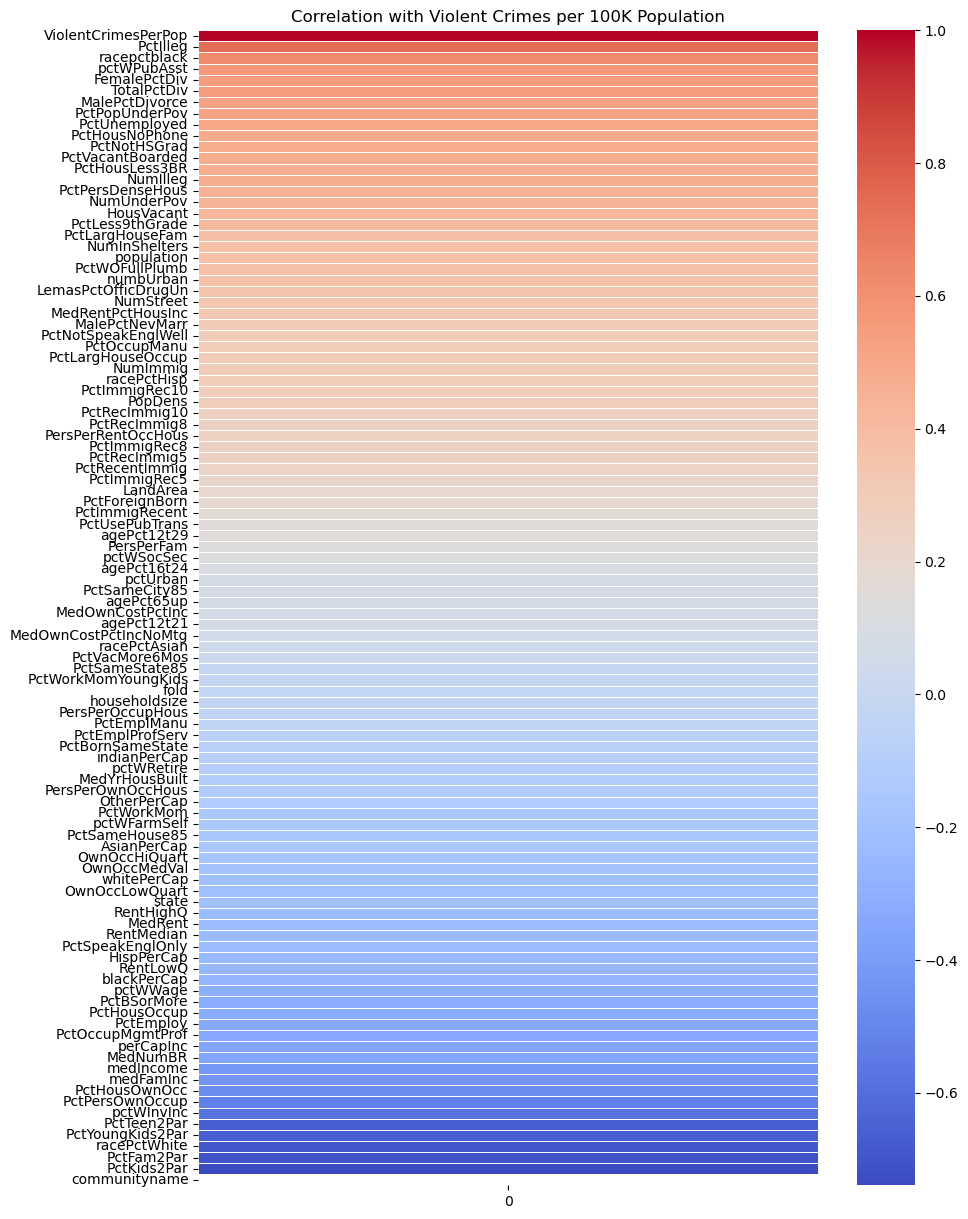

In [135]:
# Convert the Series to a 2D numpy array
target_correlation_2d = target_correlation.values[:, None]


#Plot the correlations with the target variable
plt.figure(figsize=(10, 15))
sns.heatmap(target_correlation_2d, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5,
            yticklabels=target_correlation.index)
plt.title("Correlation with Violent Crimes per 100K Population")
plt.show()

# ploting the correlation with target values ( first five targets and last five targets)

ViolentCrimesPerPop    1.000000
PctIlleg               0.739266
racepctblack           0.632904
pctWPubAsst            0.575327
FemalePctDiv           0.556125
                         ...   
PctYoungKids2Par      -0.667100
racePctWhite          -0.685631
PctFam2Par            -0.707438
PctKids2Par           -0.739231
communityname               NaN
Name: ViolentCrimesPerPop, Length: 104, dtype: float64


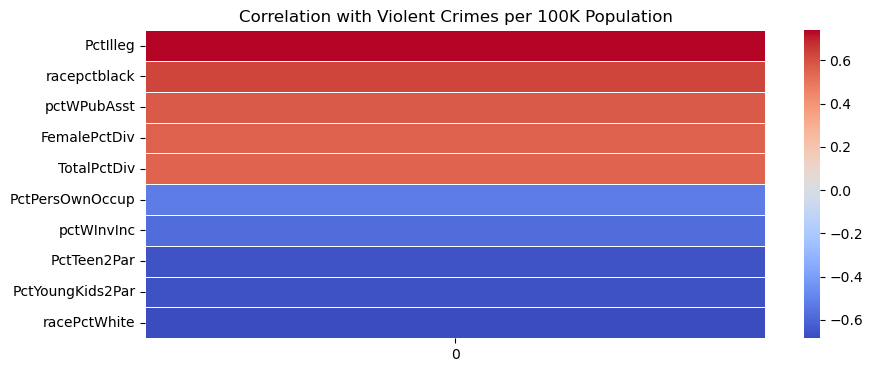

<Figure size 640x480 with 0 Axes>

In [136]:
# Convert the Series to a 2D numpy array
print(target_correlation)
small_target_correlation = target_correlation.take([1,2,3,4,5,96,97,98,99,100])
target_correlation_2d = small_target_correlation.values[:, None]
target_correlation_2d
#Plot the correlations with the target variable
plt.figure(figsize=(10, 4))
sns.heatmap(target_correlation_2d, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5,
           yticklabels=small_target_correlation.index)
plt.title("Correlation with Violent Crimes per 100K Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()
plt.savefig("correlation.png")

# Let's start with simple Linear Regression

# Building our Models

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# selected_features' are the features selected based on correlation
# Prepare the data
X = df[selected_features]
#y = df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models setup
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# A lower RMSE value generally suggests a better fit of the model to the data

In [138]:
# Train and evaluate models
rmse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_scores[name] = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_scores)

{'Ridge Regression': 0.1465655124591629, 'Lasso Regression': 0.1541847806408277, 'Random Forest Regressor': 0.14363217494418856, 'Gradient Boosting Regressor': 0.14244378000442154}


# Let's focus only on the Random Forest
Training our model

In [147]:
# Prepare the data
X = df[selected_features]
#y = df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the model with specific or default parameters
Model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_scores = mean_squared_error(y_test, y_pred, squared=False)
print(rmse_scores)

0.14244378000442154


# Cross-Validation to Assess Model Performance
The cross_val_score function performs the cross-validation. 
Here, it's configured to do a 5-fold cross-validation (cv=5), meaning the data is split into five parts; 
each part gets a turn to be the test set with the remaining parts being the train set

In [151]:
# Define the model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
# Marie provide some explanations on number of estimators, random state , and also cv
# what happen if we increase or reduces the number of estimators, random state , and also cv

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"CV RMSE scores: {cv_rmse}")
print(f"Mean CV RMSE: {np.mean(cv_rmse)}")

CV RMSE scores: [0.14502237 0.15044071 0.13919181 0.15099533 0.1334418 ]
Mean CV RMSE: 0.14381840457388106


# Hyperparameter Tuning with Grid Search

In [152]:
# Setup parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Setup Grid Search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and RMSE
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
test_predictions = best_rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test RMSE: 0.14423012359968565


# End

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading and preparation
# df = pd.read_csv('your_data.csv')  # Make sure to load your data
# Xtrain = df.drop('target_column', axis=1)
# ytrain = df['target_column']

# Hyperparameters grid setup
param_dict = {
    'n_estimators': [400, 600, 800],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

# Grid Search with OOB Score
results = {}
estimators = {}
for ntrees, max_features in product(*param_dict.values()):
    est = RandomForestRegressor(oob_score=True, n_estimators=ntrees, 
                                max_features=max_features, max_depth=50, n_jobs=-1)
    est.fit(Xtrain, ytrain)
    results[(ntrees, max_features)] = est.oob_score_
    estimators[(ntrees, max_features)] = est

# Identify the best parameters
best_params = max(results, key=results.get)
best_rf = estimators[best_params]

# Evaluate on a test set
# Xtest, ytest should be defined as your test dataset
test_score = best_rf.score(Xtest, ytest)

# Feature Importance Plot
feature_importances = pd.Series(best_rf.feature_importances_, index=Xtrain.columns)
feature_importances.sort_values().plot(kind="barh")
plt.title("Feature Importances in Random Forest")
plt.show()

# Out-of-bag score to validation score
print(f"Best OOB Score: {results[best_params]}")
print(f"Test Score: {test_score}")

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, best_rf.predict(Xtest))
print(f"Mean Absolute Error: {mae}")

NameError: name 'product' is not defined

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#defining the model
model = LinearRegression()
# fit the Linear regression to the predictor and target varibale.
results = model.fit(X,Y) # train the model

print("Intercept",results.intercept_) # beta_0
print(f"slope: {results.coef_}")
#coefficients of other predictors
pd.DataFrame(results.coef_.reshape(1,-1),columns=X.columns) 

Intercept 0.5503917043087346
slope: [ 0.18396339 -0.02231606  0.20493383 -0.04915604 -0.0144296   0.06087618
  0.11035749 -0.22921784 -0.13016221  0.04974446 -0.29644254  0.04670138
 -0.19982858 -0.20157396  0.04875141 -0.1731211   0.0761747   0.00495907
 -0.09000184  0.28797887  0.09551562 -0.35101577 -0.02875531 -0.03571694
  0.02164703  0.04380689  0.03572849  0.11115737 -0.17214385 -0.09991658
  0.05254806  0.05038826  0.00454329  0.24847432 -0.06583291 -0.02673461
  0.07234625  0.12263071  0.45851705  0.22672791  0.16273332 -0.56192431
 -0.14049326  0.01859592 -0.32265128 -0.03230383 -0.00294581  0.05915826
 -0.18611198 -0.13768061  0.1215016  -0.14411742  0.02206421  0.03594264
 -0.07777426  0.03363794 -0.02533207 -0.21822101  0.43251056 -0.18125139
 -0.02538104 -0.15180678  0.04530161 -0.19910488  0.63508812 -0.07049674
 -0.25457166 -0.67569448  0.21435256  0.1025989   0.03042671  0.15874822
 -0.04808195  0.56813321  0.04924214 -0.07892199 -0.02576789  0.00316608
 -0.01404768 -0

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.183963,-0.022316,0.204934,-0.049156,-0.01443,0.060876,0.110357,-0.229218,-0.130162,0.049744,...,0.182891,0.117498,0.006292,-0.017613,0.025766,0.013157,0.022543,-0.012622,-0.042011,0.024716


# Linear Regresssion with splitting data

In [29]:
from sklearn.model_selection import train_test_split #using this we split the data into train and test in python

#Split using the function train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=101) # splitting data into train and test
results = model.fit(X_train,Y_train)
print("Intercept",results.intercept_)

#coefficients of other regressors
pd.DataFrame(results.coef_.reshape(1,-1),columns=X.columns) 

Intercept 0.6480523916288106


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.635468,-0.088037,0.153984,-0.064994,-0.022245,0.111282,0.124666,-0.112275,-0.188613,0.081904,...,0.15539,0.047157,-0.077333,0.003951,0.010493,0.089731,-0.031547,-0.062228,-0.048229,0.023466


In [127]:
# Alternatively, convert columns to numeric, coercing errors
df = df.apply(pd.to_numeric, errors='coerce')
df

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,NaN,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,NaN,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,NaN,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,NaN,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,NaN,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6,NaN,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9,NaN,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,25,NaN,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix= df.corr()
#print(correlation_matrix)

# Focus on the correlation of features with the target variable 'ViolentCrimesPerPop'
target_correlation = correlation_matrix['ViolentCrimesPerPop'].sort_values(ascending=False)
target_correlation

ViolentCrimesPerPop    1.000000
PctIlleg               0.739266
racepctblack           0.632904
pctWPubAsst            0.575327
FemalePctDiv           0.556125
                         ...   
PctYoungKids2Par      -0.667100
racePctWhite          -0.685631
PctFam2Par            -0.707438
PctKids2Par           -0.739231
communityname               NaN
Name: ViolentCrimesPerPop, Length: 104, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features based on correlation threshold
threshold = .5  # Absolute correlation threshold
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
print(selected_features)
selected_features.remove('ViolentCrimesPerPop')  # Remove the target variable from the features list

['ViolentCrimesPerPop', 'PctIlleg', 'racepctblack', 'pctWPubAsst', 'FemalePctDiv', 'TotalPctDiv', 'MalePctDivorce', 'PctPopUnderPov', 'PctUnemployed', 'PctPersOwnOccup', 'pctWInvInc', 'PctTeen2Par', 'PctYoungKids2Par', 'racePctWhite', 'PctFam2Par', 'PctKids2Par']


# Building our model

In [77]:
# Prepare the data
X = df[selected_features]
#y = df['ViolentCrimesPerPop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.14503294895433466

# Cross-validation performance on the two best model

In [84]:
from sklearn.model_selection import cross_val_score
# Define the number of folds for cross-validation
k_folds = 5

# Perform cross-validation and calculate the mean and standard deviation of the RMSE scores for Random Forest
rf_cv_scores = cross_val_score(models["Random Forest Regressor"],X, y, cv=k_folds, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores)
rf_mean_rmse = np.mean(rf_cv_rmse)
rf_std_rmse = np.std(rf_cv_rmse)

# Perform cross-validation and calculate the mean and standard deviation of the RMSE scores for Gradient Boosting
gb_cv_scores = cross_val_score(models["Gradient Boosting Regressor"], X, y, cv=k_folds, scoring='neg_mean_squared_error')
gb_cv_rmse = np.sqrt(-gb_cv_scores)
gb_mean_rmse = np.mean(gb_cv_rmse)
gb_std_rmse = np.std(gb_cv_rmse)

print(f"Random Forest - Mean RMSE: {rf_mean_rmse:.3f}, Std Dev RMSE: {rf_std_rmse:.3f}")
print(f"Gradient Boosting - Mean RMSE: {gb_mean_rmse:.3f}, Std Dev RMSE: {gb_std_rmse:.3f}")

Random Forest - Mean RMSE: 0.144, Std Dev RMSE: 0.010
Gradient Boosting - Mean RMSE: 0.143, Std Dev RMSE: 0.009


# Try with GridSearch

In [86]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Hyperparameter grid for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Set up the GridSearchCV objects
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=3, n_jobs=-1, verbose=1)
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=gb_params, cv=3, n_jobs=-1, verbose=1)

# Conduct the grid search and fit the models
print("Tuning Random Forest...")
rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)

print("Tuning Gradient Boosting...")
gb_grid.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)

# Evaluate the best models from the grid search
rf_best_rmse = mean_squared_error(y_test, rf_grid.best_estimator_.predict(X_test), squared=False)
gb_best_rmse = mean_squared_error(y_test, gb_grid.best_estimator_.predict(X_test), squared=False)

print(f"Improved RMSE for Random Forest: {rf_best_rmse}")
print(f"Improved RMSE for Gradient Boosting: {gb_best_rmse}")

Tuning Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Tuning Gradient Boosting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Improved RMSE for Random Forest: 0.14469249354505495
Improved RMSE for Gradient Boosting: 0.14255237273965038


# Just a try

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[selected_features]
y = df['ViolentCrimesPerPop']  # Assuming target variable is correctly named
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids
params = {
    "Ridge Regression": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso Regression": {'alpha': [0.001, 0.01, 0.1, 1.0]},
    "Random Forest Regressor": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting Regressor": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Initialize and perform grid search
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate models with the best parameters found from the grid search
rmse_scores = {}
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    rmse_scores[name] = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_scores)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Ridge Regression: {'alpha': 0.1}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Lasso Regression: {'alpha': 0.001}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
{'Ridge Regression': 0.1457207039391152, 'Lasso Regression': 0.14684179043762166, 'Random Forest Regressor': 0.14410489844008884, 'Gradient Boosting Regressor': 0.14106874330446179}


# Relation between the first five significant predictors for violent crimes per 100k population

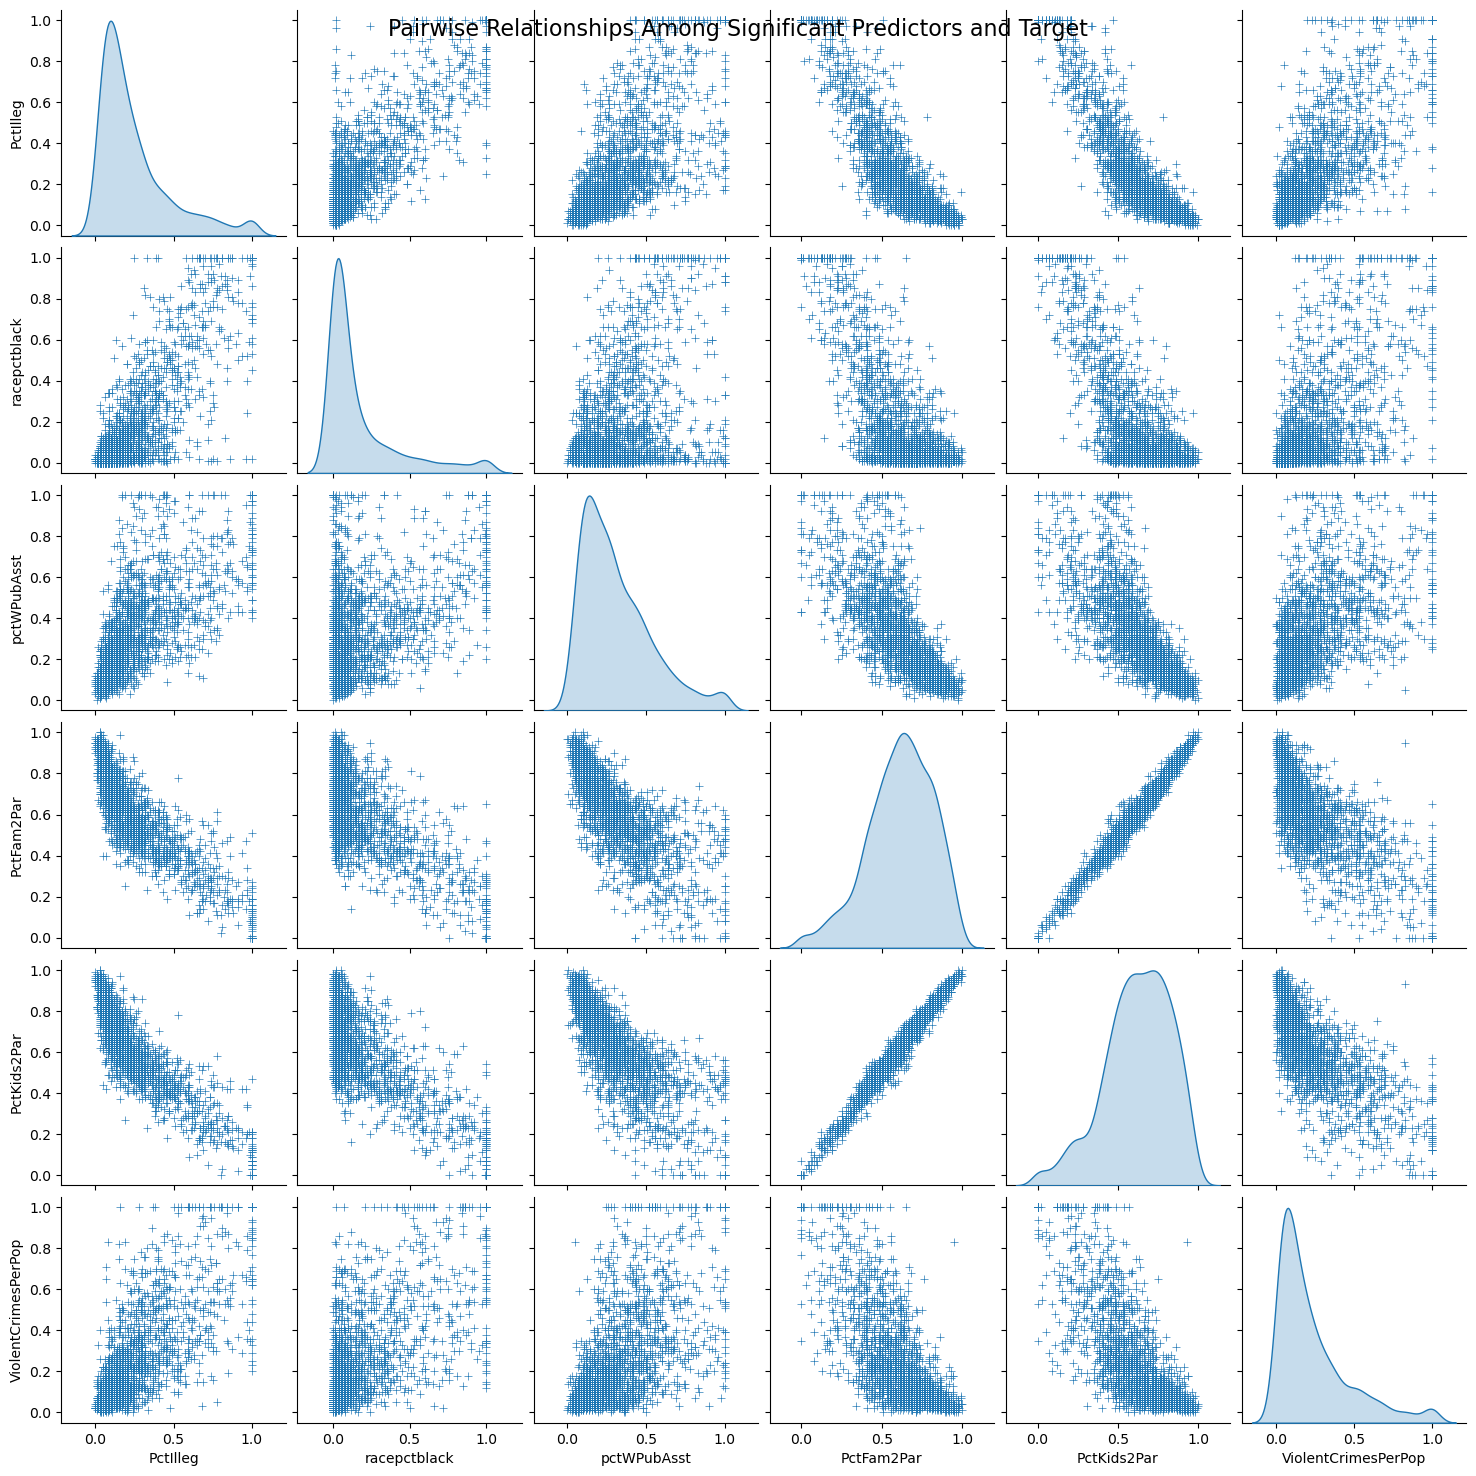

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the predictors and the target variable
predictors = ['PctIlleg', 'racepctblack', 'pctWPubAsst', 'PctFam2Par', 'PctKids2Par']
target = "ViolentCrimesPerPop"
# Subset the DataFrame to include only the predictors and target
data = df[predictors + [target]]

# Plot pairwise relationships
sns.pairplot(data, kind='scatter', diag_kind='kde', markers='+')
plt.suptitle('Pairwise Relationships Among Significant Predictors and Target', size=16)
plt.show()

# Calculate and plot the correlation matrix
#corr_matrix = data.corr()
#plt.figure(figsize=(8, 6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlation Matrix')
#plt.show()